In [1]:
import torch
import torchvision
from pathlib import Path
from torchvision import transforms 
from emonet.models import EmoNet
from emonet.data_augmentation import DataAugmentor
from skimage import io
import numpy as np

image_size = 256
n_expression = 8 # 5 or 8
# Create the data loaders
transform_image = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(image_size)])
transform_image_shape_no_flip = DataAugmentor(image_size, image_size)

flipping_indices = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 26, 25, 24, 23, 22,21, 20, 19, 18, 17, 27, 28, 29, 30, 35, 34, 33, 32, 31, 45,44, 43, 42, 47, 46, 39, 38, 37, 36, 41, 40, 54, 53, 52, 51,50, 49, 48, 59, 58,57, 56, 55, 64, 63,62, 61, 60, 67, 66,65]
transform_image_shape_flip = DataAugmentor(image_size, image_size, mirror=True, shape_mirror_indx=flipping_indices, flipping_probability=1.0)

state_dict_path = Path("/home/toni/Projects/PhD/code/emonet/pretrained") / f'emonet_{n_expression}.pth'

In [2]:
print(f'Loading the model from {state_dict_path}.')
state_dict = torch.load(str(state_dict_path), map_location='cpu')
state_dict = {k.replace('module.',''):v for k,v in state_dict.items()}
net = EmoNet(n_expression=n_expression).to("cpu")
net.load_state_dict(state_dict, strict=False)
net.eval()

Loading the model from /home/toni/Projects/PhD/code/emonet/pretrained/emonet_8.pth.


In [17]:
# Read video
video_path = "/home/toni/Projects/PhD/datasets/laugh/mahnob/CroppedVideos/S001-001_sf_874_ef_893.avi"
landmarks_path = "/home/toni/Projects/PhD/datasets/laugh/mahnob/Landmarks/S001-001_sf_874_ef_893.npy"
video = torchvision.io.read_video(video_path, pts_unit='sec')[0]
landmarks = np.load(landmarks_path)
video.shape

torch.Size([20, 492, 492, 3])

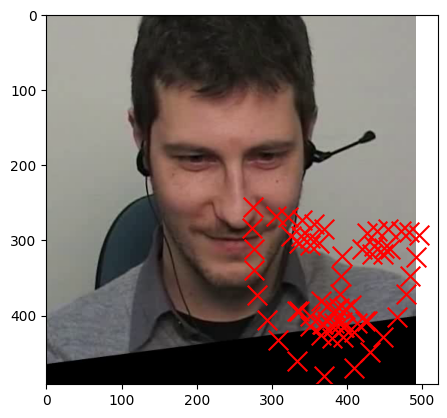

In [20]:
import matplotlib.pyplot as plt
plt.imshow(video[0])
plt.scatter(landmarks[0 , :, 0], landmarks[0, :, 1], marker="x", color="red", s=200)
plt.show()

In [14]:
image = video[0].numpy().astype(np.uint8)

image, landmarks = transform_image_shape_no_flip(image, bb=None, shape=None)
# Fix for PyTorch currently not supporting negative stric
image = np.ascontiguousarray(image)

image = transform_image(image)

image.shape

with torch.no_grad():
    out = net(image.unsqueeze(0))
# out = net(image.unsqueeze(0))
expr = out['expression']
expr = np.argmax(np.squeeze(expr.cpu().numpy()), axis=1)
expr 

AxisError: axis 1 is out of bounds for array of dimension 1

In [16]:
out

{'heatmap': tensor([[[[-1.0979e-05,  9.5226e-05,  9.5650e-05,  ...,  4.0310e-05,
            -6.7581e-07, -3.3047e-05],
           [-1.9227e-05,  8.2513e-05,  3.7802e-05,  ...,  1.8230e-05,
            -4.3750e-06, -3.1900e-05],
           [ 1.6867e-05,  8.2785e-05,  7.2230e-05,  ...,  8.7162e-05,
             4.0237e-05, -2.0462e-05],
           ...,
           [ 5.0421e-05,  7.0946e-05,  7.3193e-05,  ...,  8.1824e-05,
             9.9755e-05, -2.6224e-06],
           [ 9.0741e-05,  1.1856e-04,  8.5997e-05,  ...,  6.6779e-05,
             9.3824e-05,  3.1326e-05],
           [ 3.8280e-05,  6.6459e-05,  4.8469e-05,  ..., -1.2448e-05,
             2.8190e-05, -1.0285e-05]],
 
          [[ 1.3875e-04,  1.8904e-04,  1.8924e-04,  ...,  1.6304e-04,
             1.4363e-04,  1.2830e-04],
           [ 1.3484e-04,  1.8302e-04,  1.6185e-04,  ...,  1.5258e-04,
             1.4188e-04,  1.2884e-04],
           [ 1.5193e-04,  1.8315e-04,  1.7815e-04,  ...,  1.8522e-04,
             1.6300e-04,  1.